In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob
import os

In [2]:
df1=pd.read_csv("H:/Downloads/ResaleFlatPrices/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2=pd.read_csv("H:/Downloads/ResaleFlatPrices/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3=pd.read_csv("H:/Downloads/ResaleFlatPrices/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df4=pd.read_csv("H:/Downloads/ResaleFlatPrices/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df5=pd.read_csv("H:/Downloads/ResaleFlatPrices/Resale flat prices based on registration date from Jan-2017 onwards.csv")



In [3]:
# merging all the datasets

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
936732,2024-09,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,850000.0,62 years 10 months
936733,2024-09,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,800000.0,62 years 10 months
936734,2024-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,770000.0,62 years 03 months
936735,2024-09,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,1068888.0,66 years 10 months


In [4]:
df.shape


(936737, 11)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936737 entries, 0 to 936736
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                936737 non-null  object 
 1   town                 936737 non-null  object 
 2   flat_type            936737 non-null  object 
 3   block                936737 non-null  object 
 4   street_name          936737 non-null  object 
 5   storey_range         936737 non-null  object 
 6   floor_area_sqm       936737 non-null  float64
 7   flat_model           936737 non-null  object 
 8   lease_commence_date  936737 non-null  int64  
 9   resale_price         936737 non-null  float64
 10  remaining_lease      227687 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.6+ MB


In [6]:
df.columns


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,936737.0,95.687165,25.809464,28.0,73.0,93.0,113.0,366.7
lease_commence_date,936737.0,1988.376825,10.764252,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,936737.0,323821.046235,173320.787601,5000.0,195000.0,300000.0,420000.0,1588000.0


In [8]:
df['resale_price'].value_counts()


resale_price
300000.0    6941
350000.0    6888
280000.0    6558
320000.0    6545
380000.0    6351
            ... 
308398.0       1
428200.0       1
325288.0       1
246650.0       1
458988.0       1
Name: count, Length: 9664, dtype: int64

In [9]:
# Data Cleaning

df.nunique()


month                   417
town                     27
flat_type                 8
block                  2714
street_name             586
storey_range             25
floor_area_sqm          213
flat_model               34
lease_commence_date      55
resale_price           9664
remaining_lease         728
dtype: int64

In [10]:
df.isna().sum()


month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [11]:
# REMAINING_LEASE

def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [12]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)


In [13]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
936732,2024-09,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,850000.0,62.833333
936733,2024-09,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,800000.0,62.833333
936734,2024-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,770000.0,62.250000
936735,2024-09,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,1068888.0,66.833333
936736,2024-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,146.0,Maisonette,1987,893888.0,62.250000


In [14]:
df['remaining_lease'].value_counts()


remaining_lease
68.000000    711673
95.000000      2425
67.000000      2223
69.000000      1915
71.000000      1783
              ...  
97.583333         1
97.416667         1
97.250000         1
96.833333         1
97.750000         1
Name: count, Length: 675, dtype: int64

In [15]:
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [16]:
df.dtypes


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [17]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [18]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
936735,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,1068888.0,66.833333,2024,09,7,9
936736,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,146.0,Maisonette,1987,893888.0,62.250000,2024,09,1,3


In [19]:
df.drop('storey_range', axis = 1, inplace= True)


In [20]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [21]:
df.head()


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [22]:
df.dtypes


town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [23]:
#TEXT ERRORS

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [24]:
df['town'].value_counts()


town
TAMPINES           80620
YISHUN             70691
JURONG WEST        67329
BEDOK              67120
WOODLANDS          66216
ANG MO KIO         52468
HOUGANG            51259
BUKIT BATOK        45019
CHOA CHU KANG      38771
BUKIT MERAH        34717
PASIR RIS          33439
SENGKANG           33235
TOA PAYOH          31830
QUEENSTOWN         29026
GEYLANG            28437
CLEMENTI           28238
BUKIT PANJANG      27979
KALLANG/WHAMPOA    27554
JURONG EAST        24977
SERANGOON          22987
BISHAN             21401
PUNGGOL            21366
SEMBAWANG          14155
MARINE PARADE       8087
CENTRAL AREA        7212
BUKIT TIMAH         2540
LIM CHU KANG          64
Name: count, dtype: int64

In [25]:
df['flat_type'].value_counts()


flat_type
4 ROOM              356477
3 ROOM              298307
5 ROOM              197692
EXECUTIVE            70291
2 ROOM               12120
1 ROOM                1306
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [26]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [27]:
df['flat_type'].value_counts()


flat_type
4 ROOM              356477
3 ROOM              298307
5 ROOM              197692
EXECUTIVE            70291
2 ROOM               12120
1 ROOM                1306
MULTI GENERATION       544
Name: count, dtype: int64

In [28]:
df['street_name'].value_counts()


street_name
YISHUN RING RD        17721
BEDOK RESERVOIR RD    14817
ANG MO KIO AVE 10     13893
ANG MO KIO AVE 3      12225
HOUGANG AVE 8          9416
                      ...  
OUTRAM HILL               9
BIDADARI PK DR            5
MARINE PARADE CTRL        3
SENGKANG WEST RD          2
ALJUNIED AVE 2            1
Name: count, Length: 586, dtype: int64

In [29]:
df['flat_model'].value_counts()


flat_model
Model A                   198501
Improved                  170505
New Generation            111199
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47813
Simplified                 34639
Apartment                  25894
Standard                   25394
SIMPLIFIED                 23258
Maisonette                 17698
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10253
APARTMENT                   9901
DBSS                        3406
Adjoined flat               1265
Model A-Maisonette          1109
MODEL A-MAISONETTE           982
Terrace                      449
Type S1                      447
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      222
2-room                       153
Premium Apartment Loft       114
Premium Maisonette            86
Improved-Maisonette           84

In [30]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [31]:
df['flat_model'].value_counts()


flat_model
Model A                   268882
Improved                  244094
New Generation            190097
Simplified                 57897
Premium Apartment          47819
Standard                   42769
Apartment                  35795
Maisonette                 29913
Model A2                   10253
DBSS                        3406
Model A-Maisonette          2091
Adjoined flat               1265
Terrace                      696
Multi Generation             544
Type S1                      447
Type S2                      222
2-room                       174
Improved-Maisonette          128
Premium Apartment Loft       114
Premium Maisonette            86
3Gen                          45
Name: count, dtype: int64

In [32]:
# Duplicates

df.duplicated().sum()


2360

In [33]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [34]:
# Outliers

float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [35]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

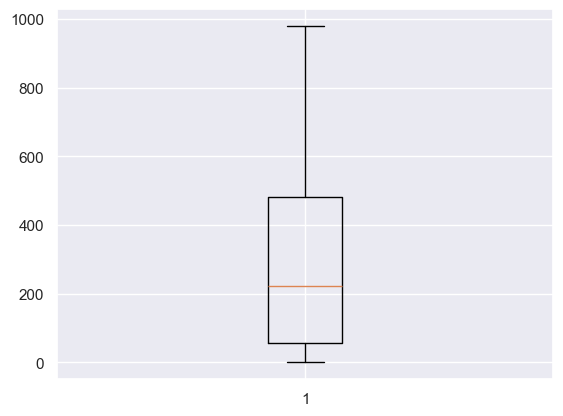

In [36]:
# Using Boxplot

# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()


In [37]:
# IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-587.0, 1125.0)

In [38]:
df.block = df.block.clip(lower_bound , upper_bound)


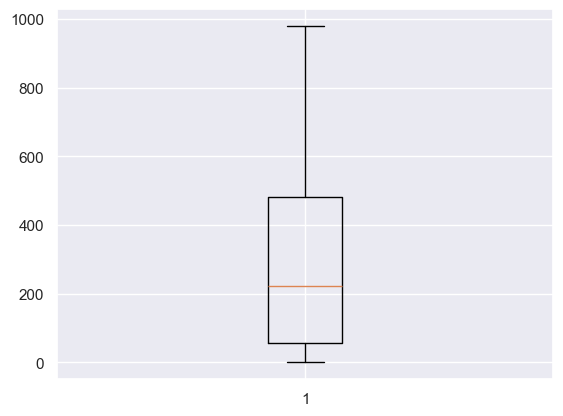

In [39]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()


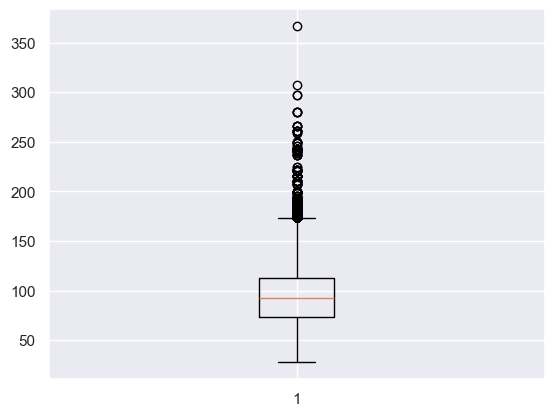

In [40]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()


In [41]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [42]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)


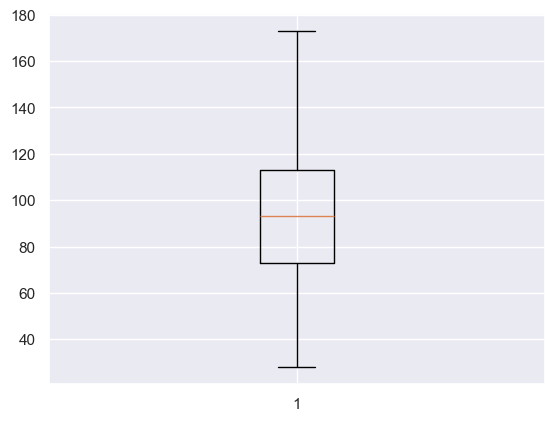

In [43]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()


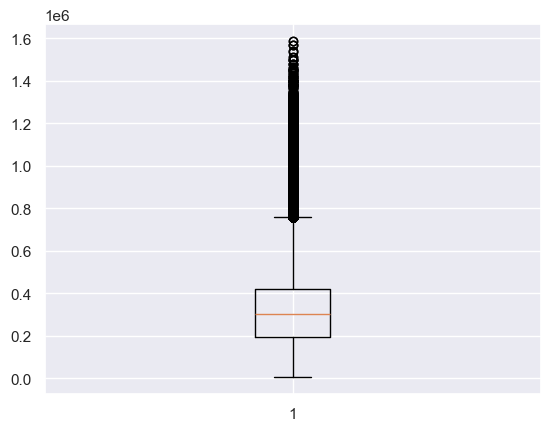

In [44]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [45]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-142500.0, 757500.0)

In [46]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)


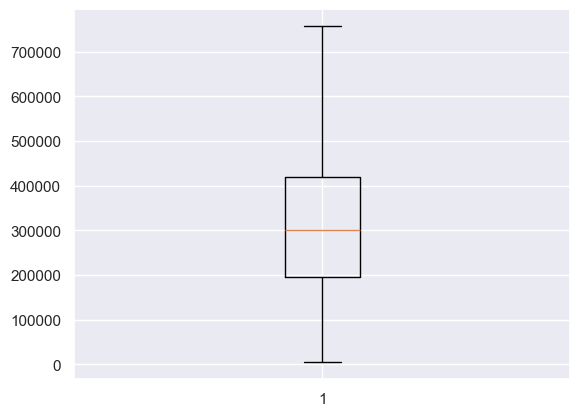

In [47]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()


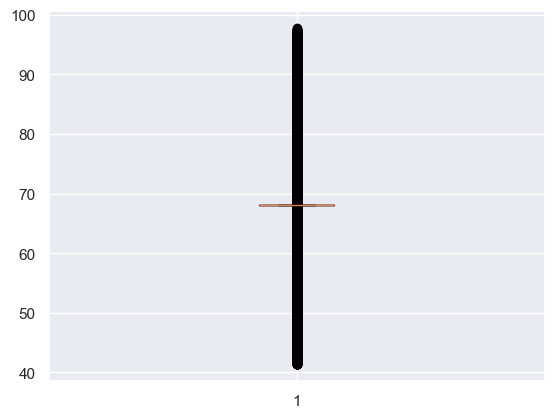

In [48]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [49]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [50]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)


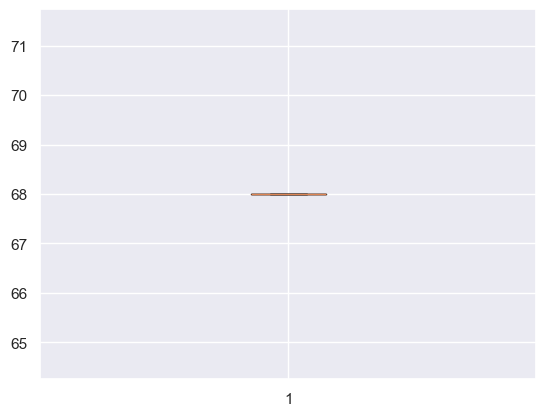

In [51]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

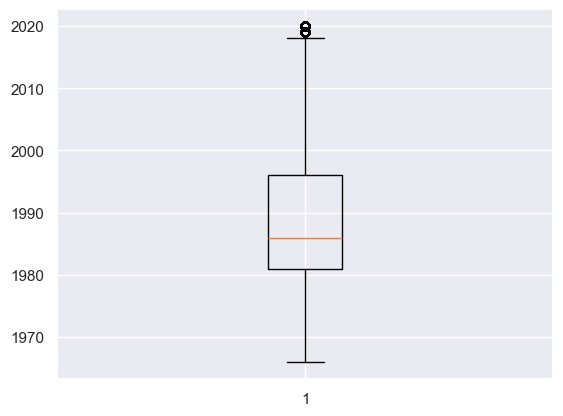

In [52]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()


In [53]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [54]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)


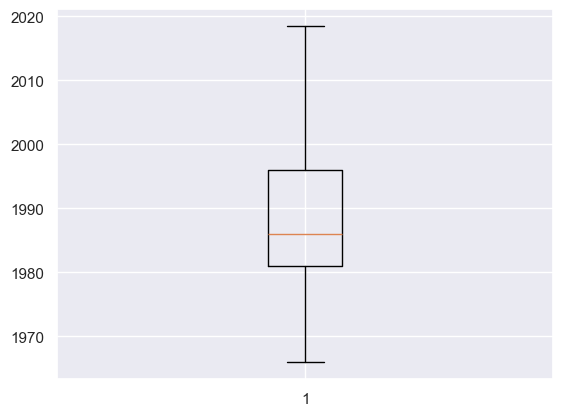

In [55]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

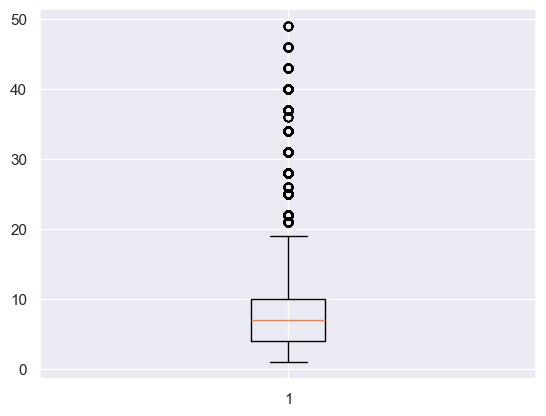

In [56]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [57]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [58]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)


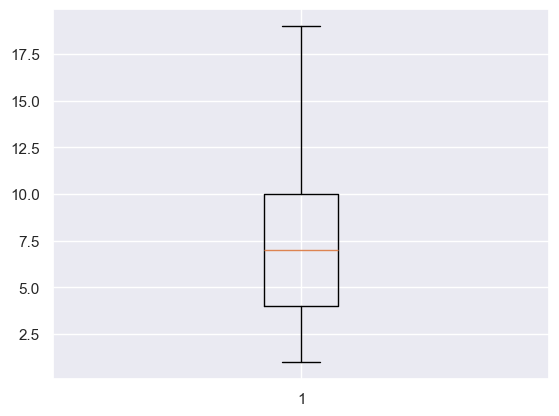

In [59]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()


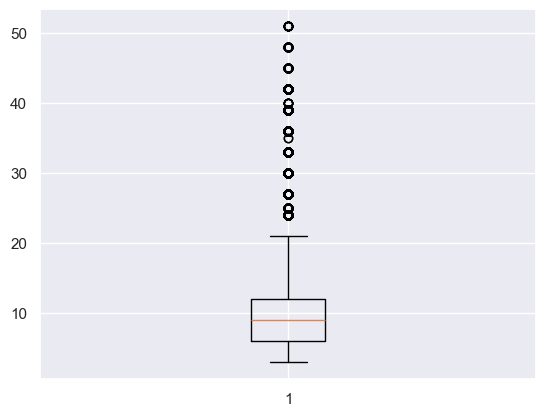

In [60]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [61]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [62]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)


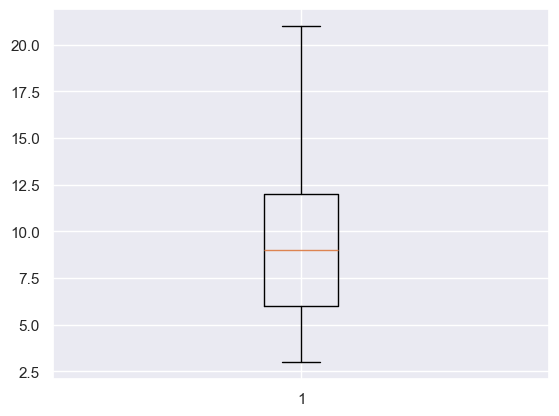

In [63]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

Encoding Categorical Variables


In [64]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [65]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [66]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [67]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [68]:
df1['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [69]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [70]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [71]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [72]:
# save the preprocessed data for the deployment
df1.to_csv('finaldata.csv',index= False)

In [73]:
# To read the file

df1=pd.read_csv('finaldata.csv')



In [74]:
# Correlation

# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.207812,0.049124,0.586447,0.200482,0.164113,0.331885,0.123569,NaN,0.123849,0.004312,-0.018894,-0.018638
flat_type,0.207812,1.000000,0.127789,0.384940,0.954855,0.241419,0.403117,0.594135,NaN,0.099662,0.003518,0.076939,0.077266
block,0.049124,0.127789,1.000000,0.042932,0.188065,-0.004526,-0.004012,-0.087040,NaN,-0.119820,0.001292,-0.125842,-0.125870
street_name,0.586447,0.384940,0.042932,1.000000,0.353526,0.354410,0.735903,0.379714,NaN,0.317793,0.007399,0.082771,0.083388
floor_area_sqm,0.200482,0.954855,0.188065,0.353526,1.000000,0.199398,0.380477,0.568084,NaN,0.061121,0.002786,0.043128,0.043315
flat_model,0.164113,0.241419,-0.004526,0.354410,0.199398,1.000000,0.354490,0.245453,NaN,0.162337,0.002169,0.020740,0.021087
lease_commence_date,0.331885,0.403117,-0.004012,0.735903,0.380477,0.354490,1.000000,0.546599,NaN,0.434196,0.005829,0.156509,0.156877
resale_price,0.123569,0.594135,-0.087040,0.379714,0.568084,0.245453,0.546599,1.000000,NaN,0.690051,0.009581,0.210956,0.213507
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.123849,0.099662,-0.119820,0.317793,0.061121,0.162337,0.434196,0.690051,NaN,1.000000,-0.020266,0.097784,0.099725


Heatmap


<Axes: >

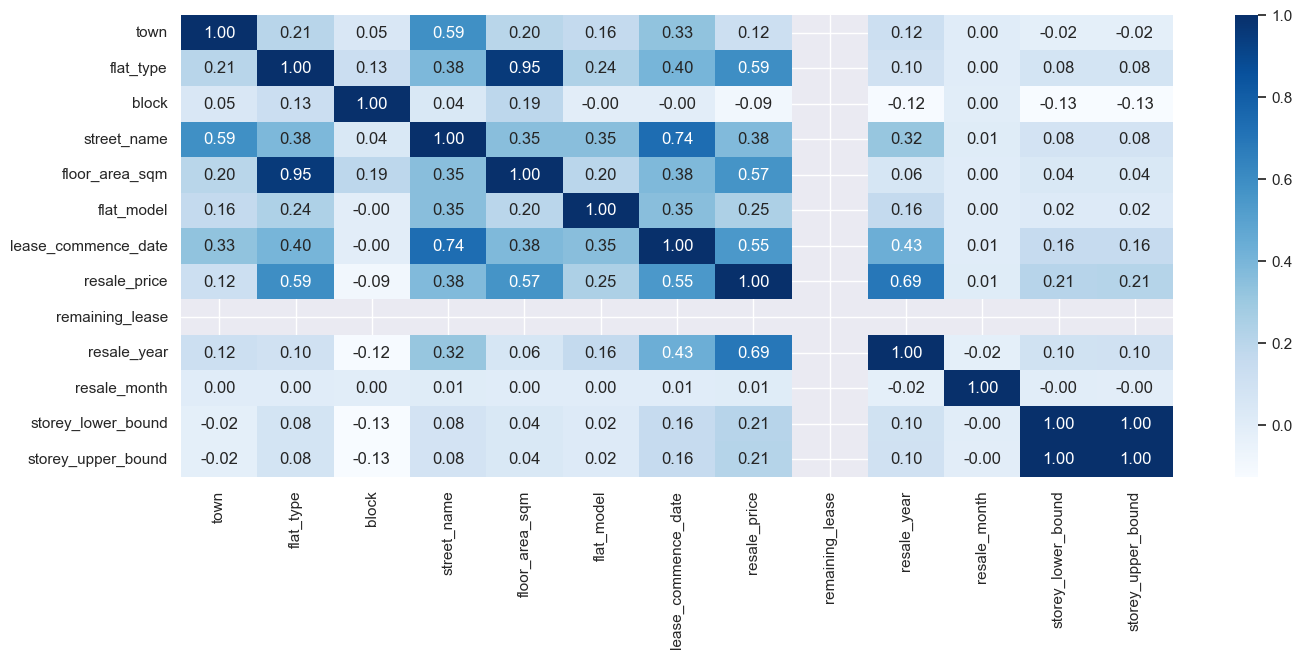

In [75]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

TO MEACHIN LEARNING

Split



In [76]:
# assign feature and target variable
x = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(747501, 12) (186876, 12) (747501,) (186876,)


Scalling


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled ,x_test_scaled

(array([[-0.47052639, -0.01579219, -1.10381388, ...,  1.30450295,
         -1.25435773, -1.25780493],
        [-0.34236285, -1.07100629, -0.66612738, ...,  0.42209553,
         -1.25435773, -1.25780493],
        [-0.47052639, -1.07100629, -0.98202286, ...,  1.59863876,
         -1.25435773, -1.25780493],
        ...,
        [ 1.45192672,  1.03942191, -0.1865752 , ..., -0.16617608,
          1.43694095,  1.43401347],
        [ 0.29845485, -0.01579219, -0.75747065, ...,  0.42209553,
          1.43694095,  1.43401347],
        [-1.23950764, -0.01579219,  0.44902172, ...,  0.71623134,
         -0.58153306, -0.58485033]]),
 array([[ 1.58009026,  1.03942191, -0.55575426, ...,  0.12795973,
          0.09129161,  0.08810427],
        [ 1.0674361 , -0.01579219,  1.37387234, ...,  0.42209553,
          0.76411628,  0.76105887],
        [ 0.68294548, -0.01579219,  0.10267849, ...,  1.59863876,
          0.76411628,  0.76105887],
        ...,
        [ 0.81110902, -0.01579219, -1.10381388, ..., -

EDA - EXPLORATARY DATA ANALYSIS


In [78]:
# Categorical Vs Frequency using BarPlot


In [79]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

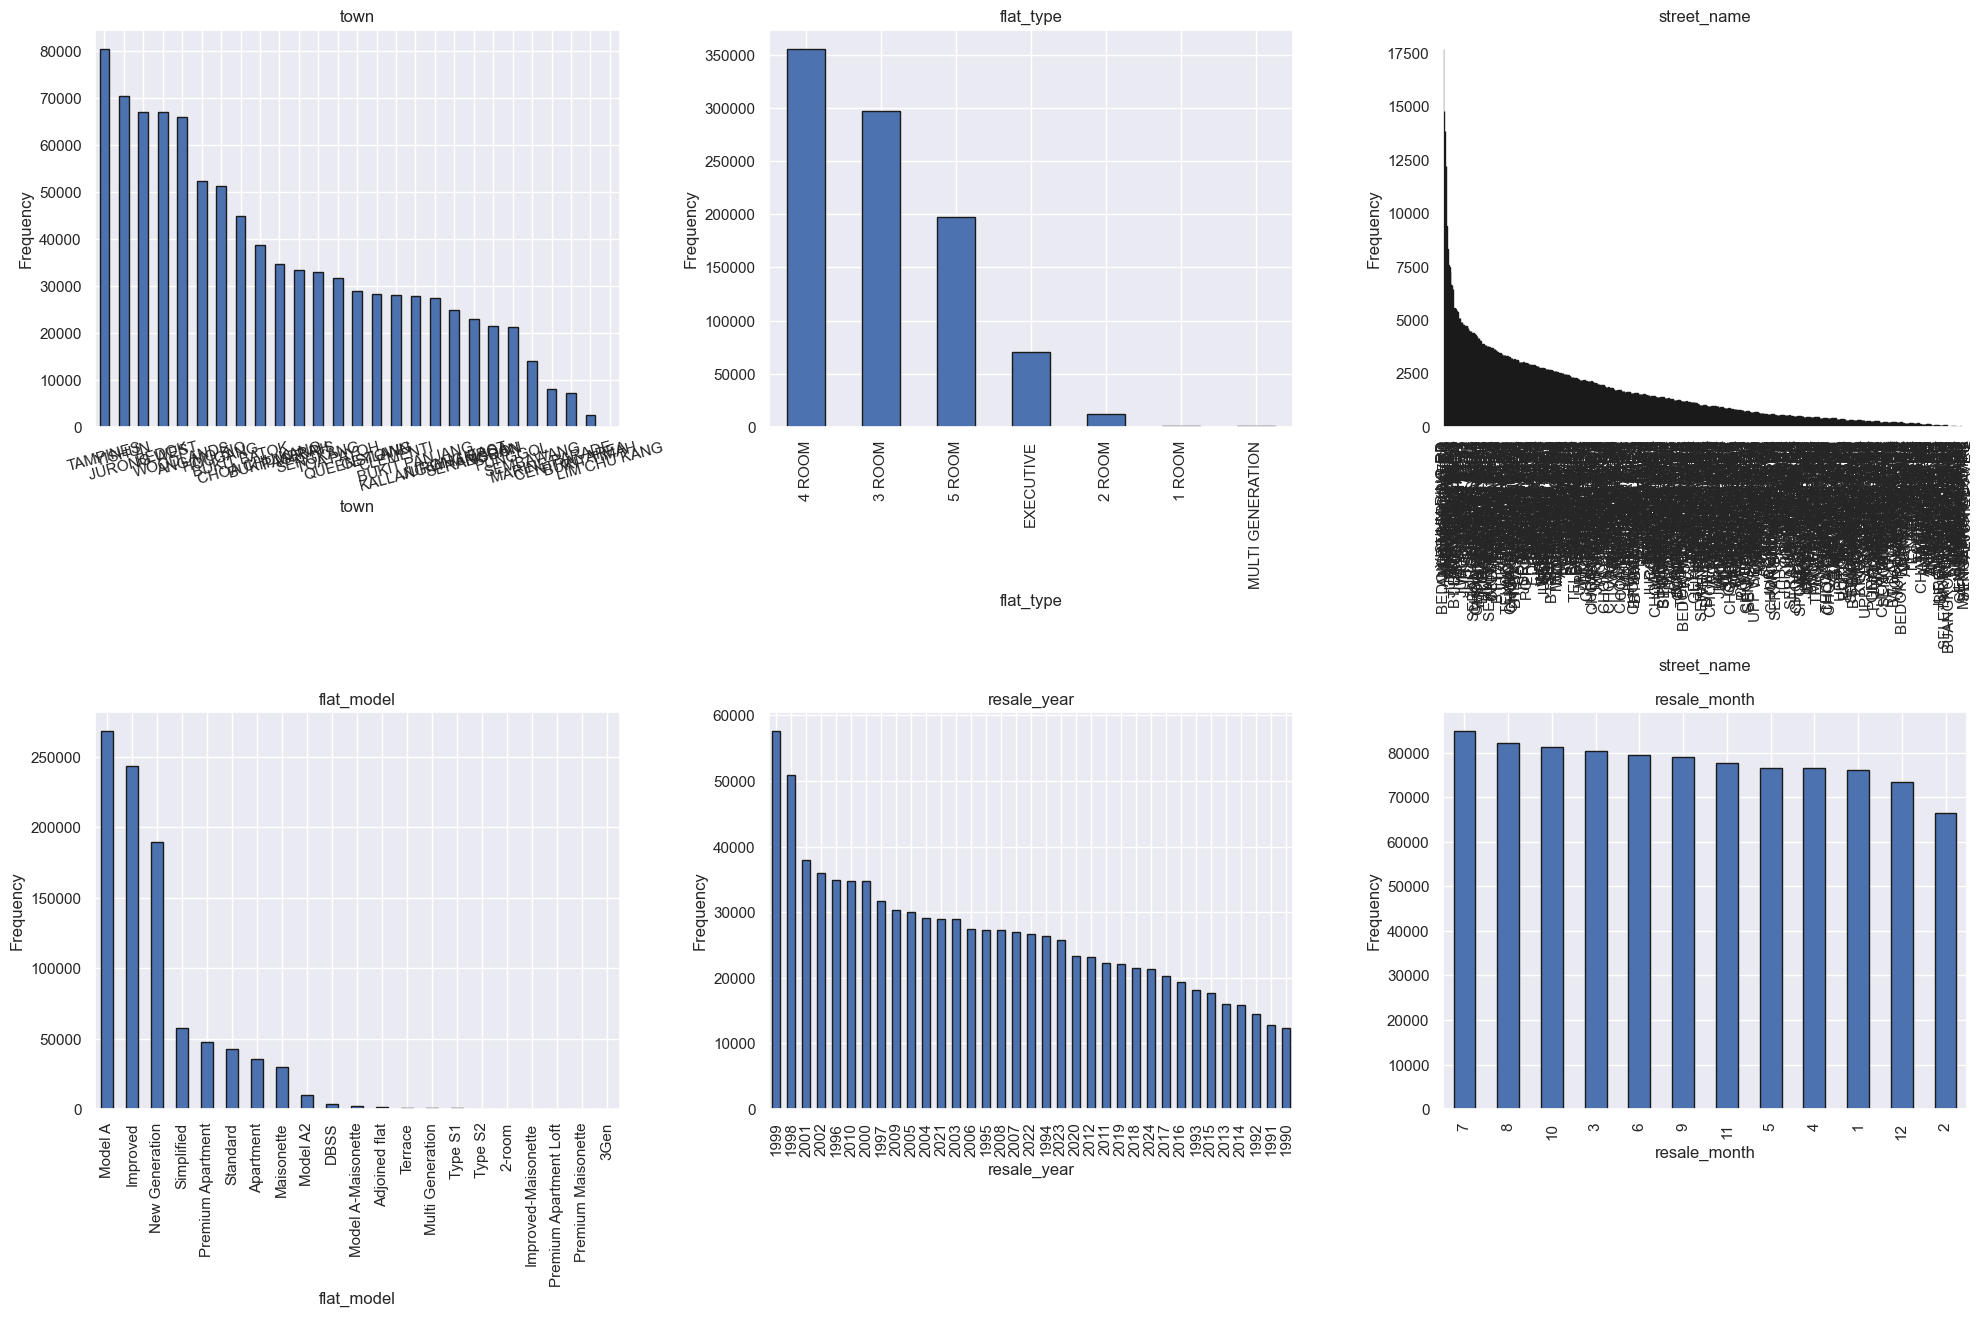

In [80]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

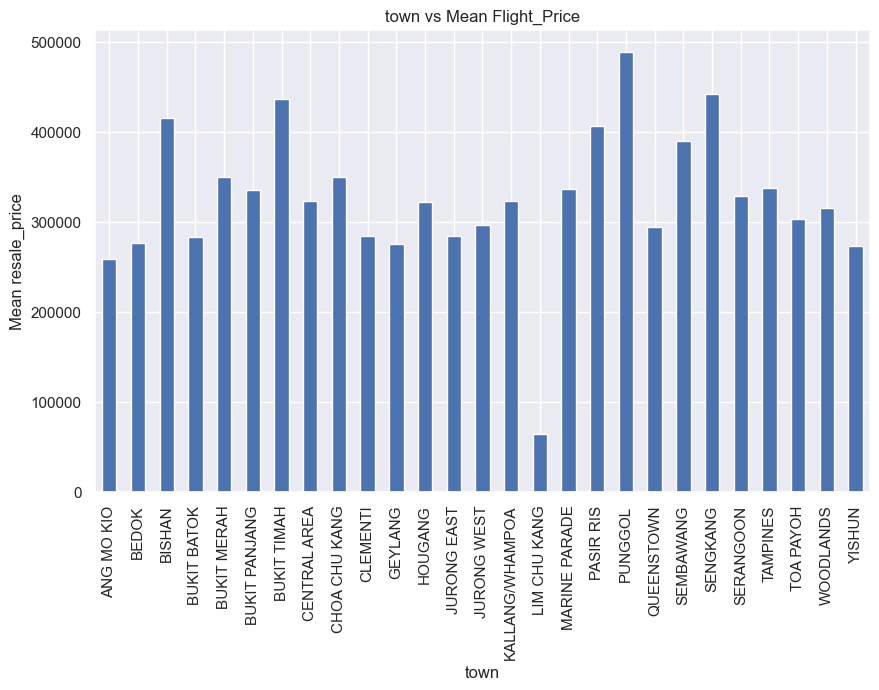

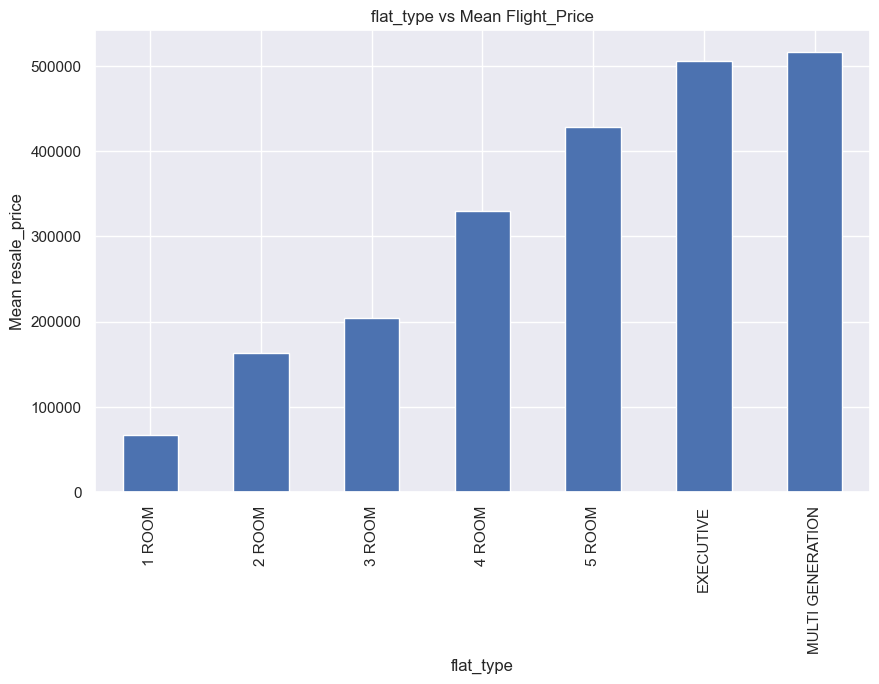

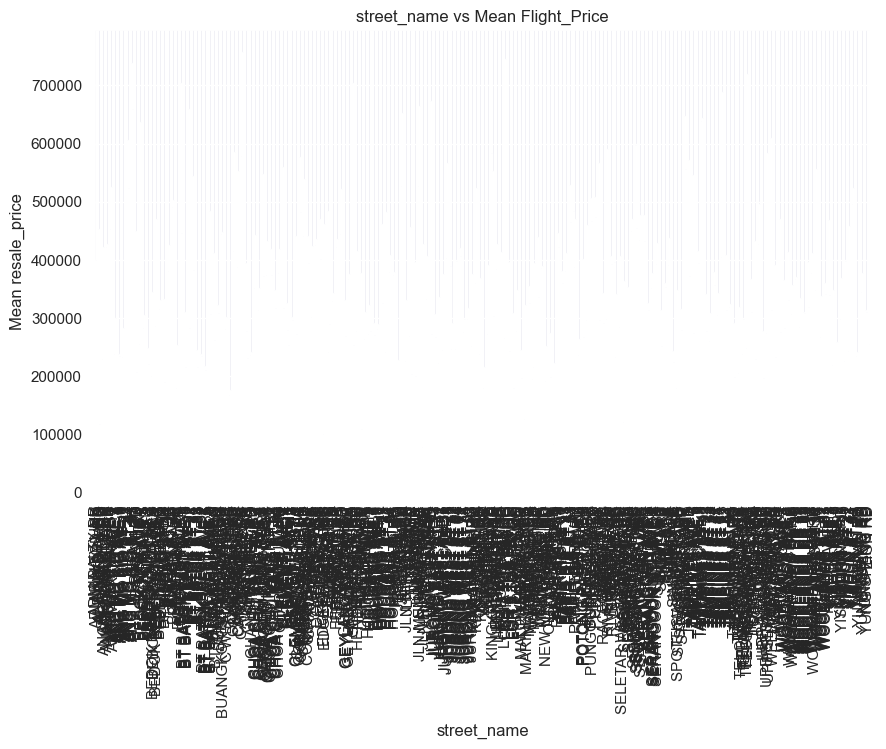

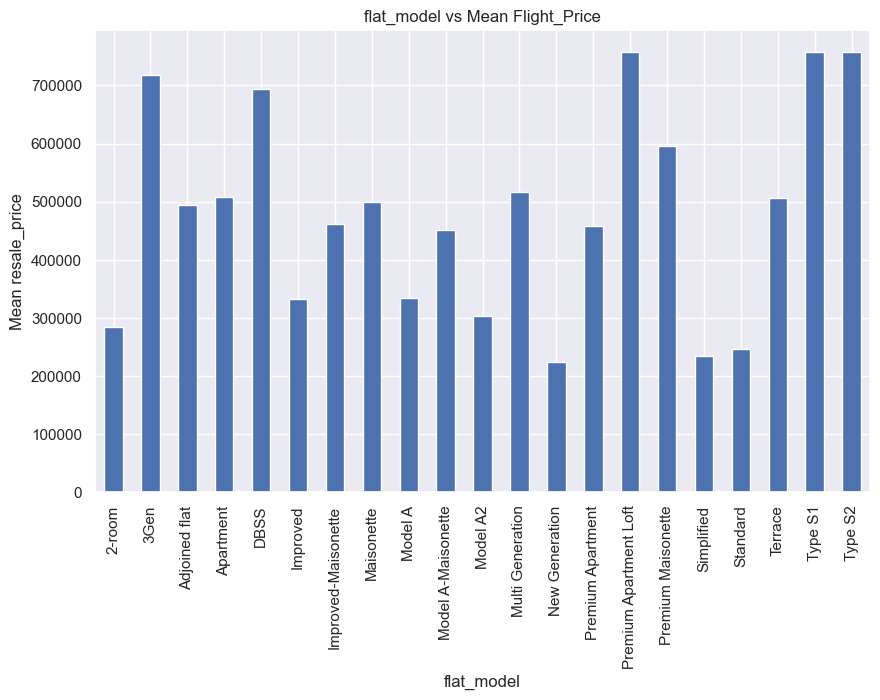

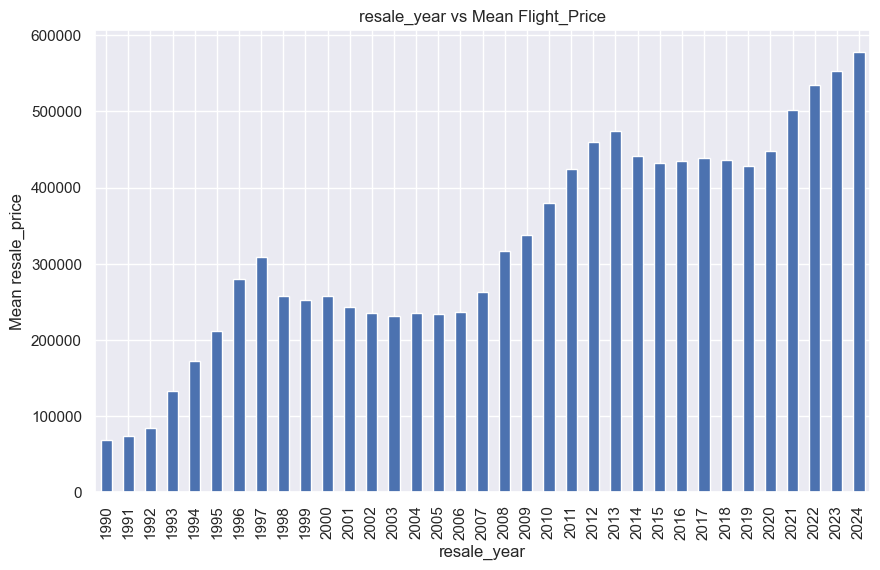

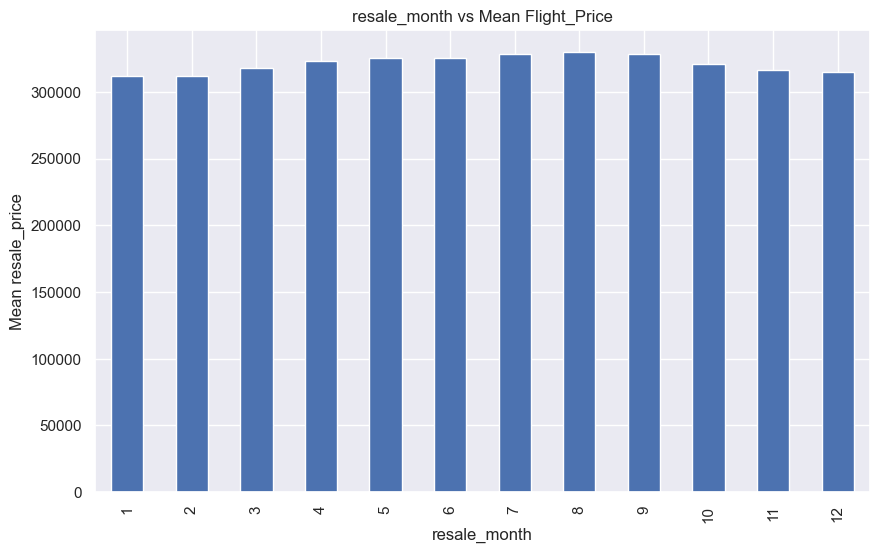

In [81]:
#Feature Vs Target (Categorical Data )

# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()


In [82]:
# Feature Vs Target (Condinues Data )

float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols


['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [83]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

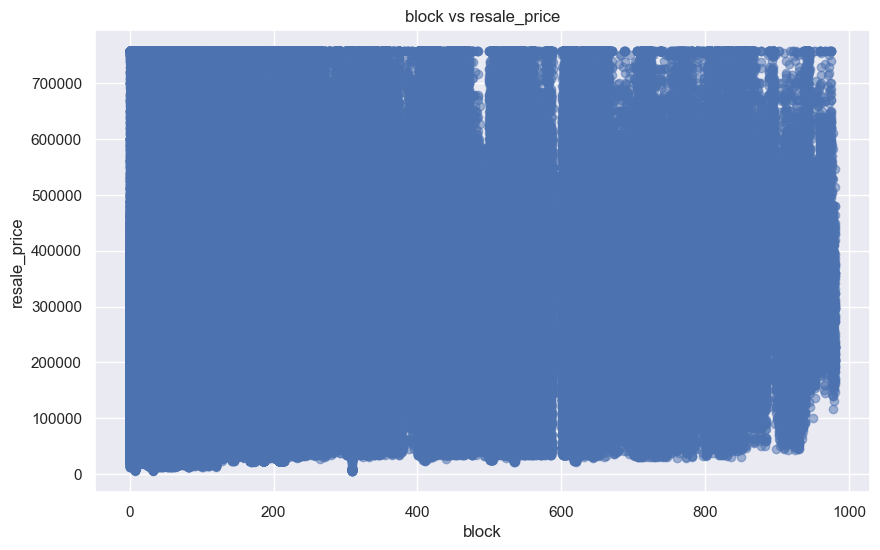

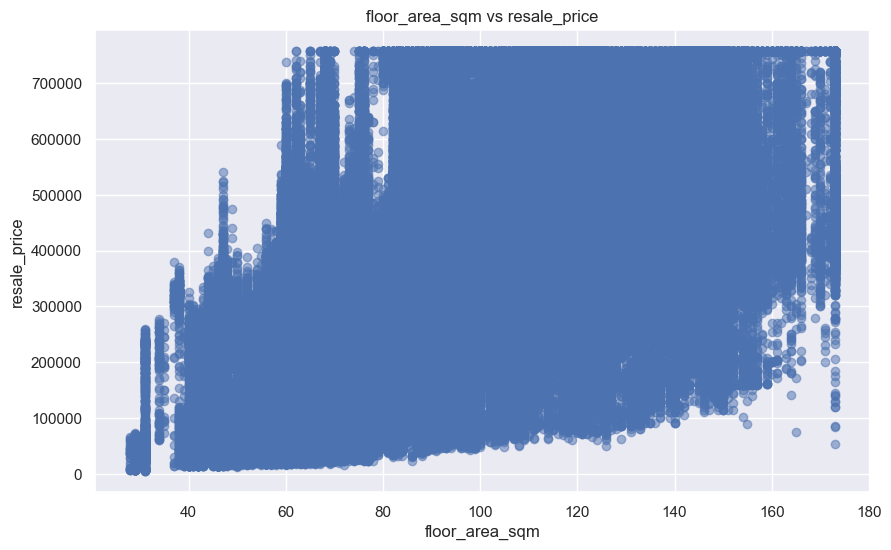

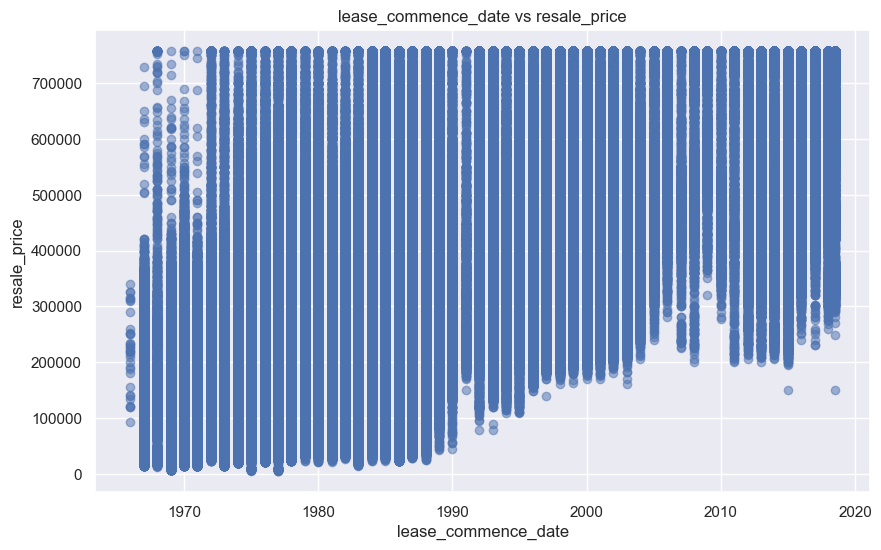

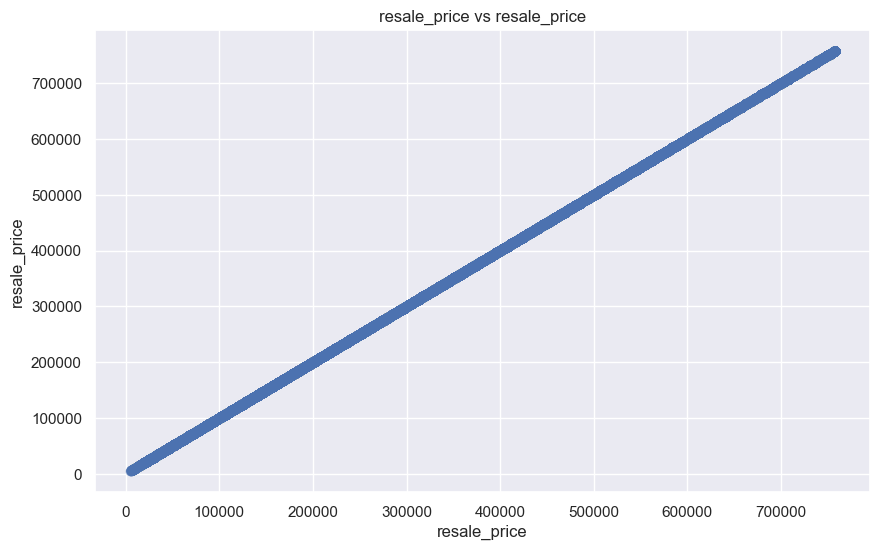

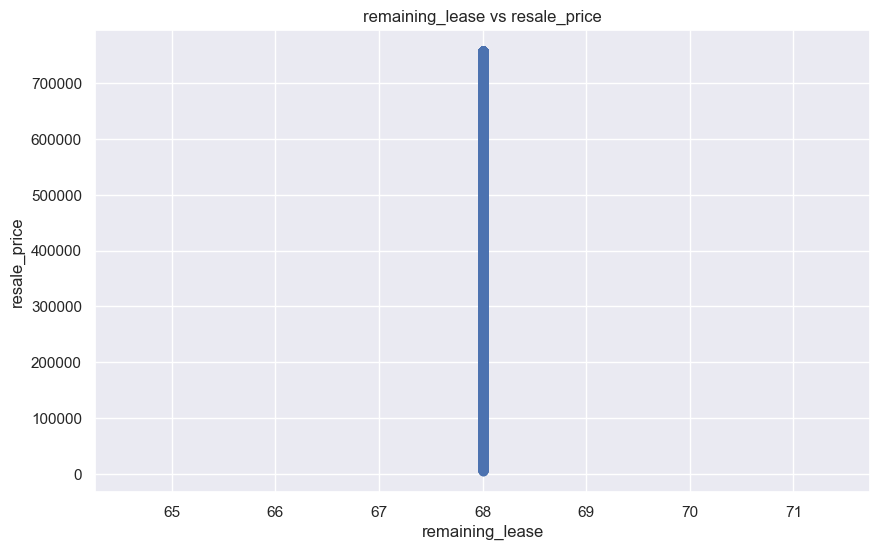

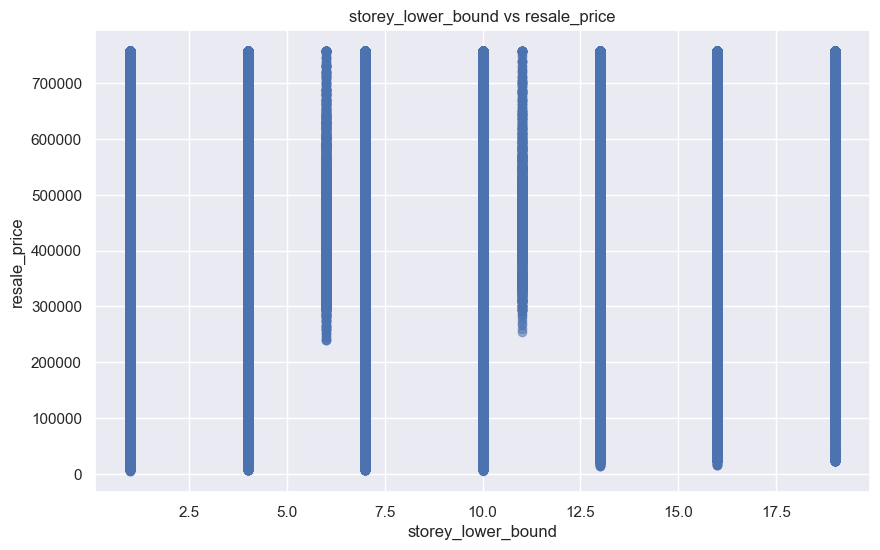

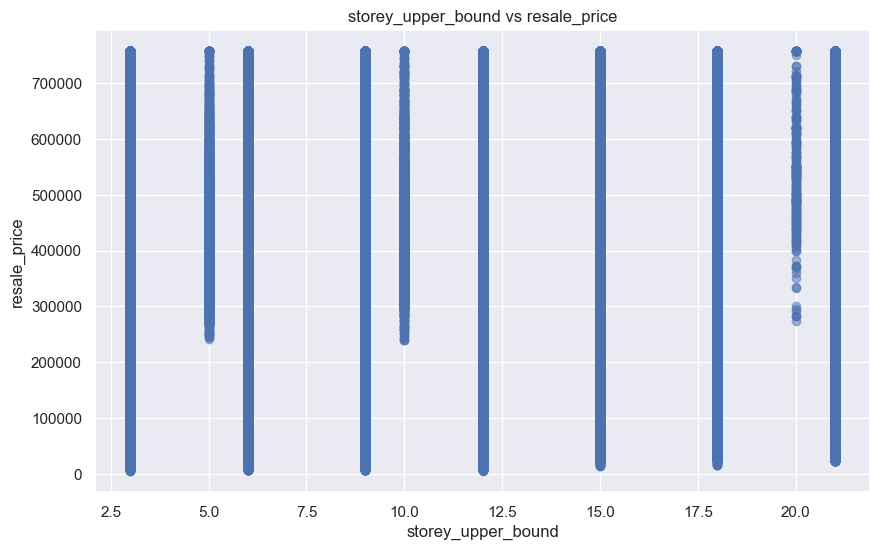

In [84]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound',
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()


Heatmap


<Axes: >

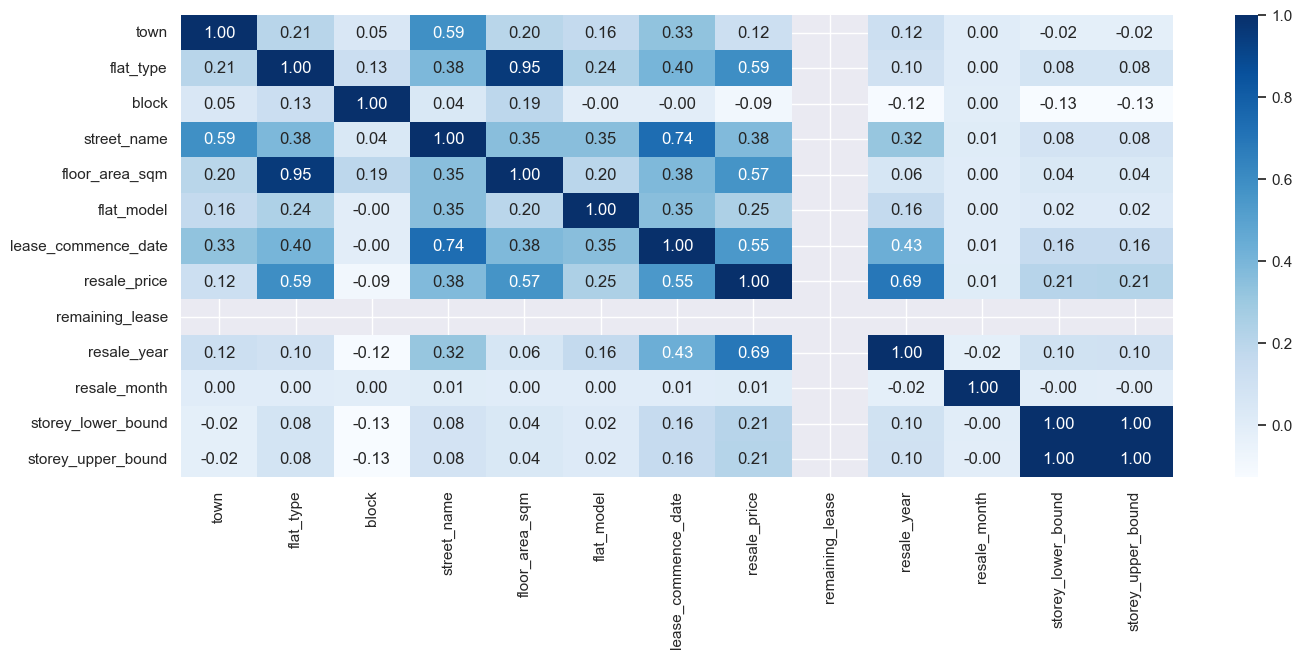

In [85]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

TO MEACHIN LEARNING

Split



In [86]:
# assign feature and target variable
x = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(747501, 12) (186876, 12) (747501,) (186876,)


Scalling


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled ,x_test_scaled

(array([[-0.47052639, -0.01579219, -1.10381388, ...,  1.30450295,
         -1.25435773, -1.25780493],
        [-0.34236285, -1.07100629, -0.66612738, ...,  0.42209553,
         -1.25435773, -1.25780493],
        [-0.47052639, -1.07100629, -0.98202286, ...,  1.59863876,
         -1.25435773, -1.25780493],
        ...,
        [ 1.45192672,  1.03942191, -0.1865752 , ..., -0.16617608,
          1.43694095,  1.43401347],
        [ 0.29845485, -0.01579219, -0.75747065, ...,  0.42209553,
          1.43694095,  1.43401347],
        [-1.23950764, -0.01579219,  0.44902172, ...,  0.71623134,
         -0.58153306, -0.58485033]]),
 array([[ 1.58009026,  1.03942191, -0.55575426, ...,  0.12795973,
          0.09129161,  0.08810427],
        [ 1.0674361 , -0.01579219,  1.37387234, ...,  0.42209553,
          0.76411628,  0.76105887],
        [ 0.68294548, -0.01579219,  0.10267849, ...,  1.59863876,
          0.76411628,  0.76105887],
        ...,
        [ 0.81110902, -0.01579219, -1.10381388, ..., -

Model Fit


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression


In [90]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train)
print(linear_model.predict(x_test))  #prediction
print(y_test)

[416609.46181064 210245.19704695 325813.40110674 ... 397815.72181605
  79151.12446939 460727.15183767]
498305    272000.0
134033    345000.0
423256    270000.0
438359    220000.0
710154    460000.0
            ...   
774003    545000.0
429778    180000.0
713744    600000.0
235655    127000.0
684232    425000.0
Name: resale_price, Length: 186876, dtype: float64


In [91]:
linear_model.score(x_test, y_test)


0.7961122657022045

In [92]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,x_train,y_train,cv=10).mean()
cross_val_linear_model


0.7947739370797657

KNN-K Nearest Neighbor Regression


In [93]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(x_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(x_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 29176.224729692414
Mean Squared Error (MSE)     : 1803858449.804291
Root Mean Square Error (RMSE): 42471.854795903266
R-squared (R2) Score         : 0.9338142569604184


Decision Tree Regression


In [94]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(x_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17688.002232141436
Mean Squared Error (MSE)     : 695927494.0555216
Root Mean Square Error (RMSE): 26380.43771538906
R-squared (R2) Score         : 0.9744655805444513


Random Forest Regression


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13982.200691819127
Mean Squared Error (MSE)     : 410412144.77525663
Root Mean Square Error (RMSE): 20258.63136480983
R-squared (R2) Score         : 0.984941483209303


Xg Boost Regression


In [96]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(x_train, y_train)

# Make predictions
y_pred = xgregressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16950.683247879624
Mean Squared Error (MSE)     : 563598895.61039
Root Mean Square Error (RMSE): 23740.23790130145
R-squared (R2) Score         : 0.9793208764876711


**Finalizing** The Models:


In [97]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9338142569604184
DecisionTreeRegressor 0.9744655805444513
RandomForestRegressor 0.984941483209303
XGBRegressor 0.9793208764876711

Model: RandomForestRegressor contain Maximum R2_Score: 0.984941483209303 


In [98]:
# Suggestion:

rf_regressor.feature_importances_


array([0.04410641, 0.06177813, 0.01407036, 0.02327739, 0.26084548,
       0.00745222, 0.02737638, 0.        , 0.54451095, 0.00638348,
       0.00445074, 0.00574846])

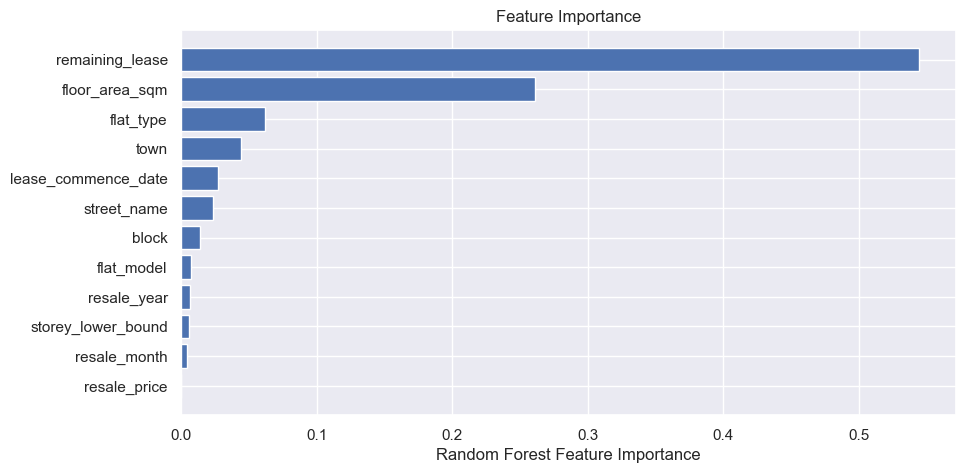

In [99]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


In [100]:
# Save the model

model=rf_regressor.fit(x_train,y_train)
model


RandomForestRegressor(random_state=42)

In [101]:
import pickle

# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(filename, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


Prediction

In [102]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
844875,19,4,930.0,187,104.0,16,1984.0,505000.0,68.0,2021,6,7,9
352938,2,2,534.0,11,45.0,14,1986.0,89000.0,68.0,2001,11,4,6
627701,21,6,342.0,258,162.0,18,1995.0,518000.0,68.0,2010,11,10,12
476939,11,3,126.0,114,67.0,15,1983.0,156000.0,68.0,2005,10,10,12
624345,14,2,6.0,143,42.0,17,1979.0,200000.0,68.0,2010,10,13,15


In [103]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

Resale Price


In [105]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([461168.8 ,  91385.  , 518234.28, 158762.  , 211335.  ])